#Recitation0-C: Pytorch_Tensors_Conversion
## Introduction

1. PyTorch is an open-source deep learning framework


1. How do I install PyTorch?
  1. pip3 install torch torchvision torchaudio
  1. conda install pytorch torchvision torchaudio -c pytorch


## Contents
1. Introduction
1. Contents
1. Pytorch Tensors
  1. Tensor creation
  2. Tensors to Numpy and vice versa
2. Accessing and modifying data
  1. Tensor indexing
  2. Tensor slicing
3. Pivoting Data
  1. Flatten
  1. Squeeze
  1. Reshape
  1. View
  1. Transpose
  1. Permute
4. Combining tensors
  1. Cat
  2. Stack
  3. Repeat
  4. Padding
5. Mathematical operations
  1. Point-wise/element-wise operations
  1. Reduction operations
  1. Comparison operations
  1. Vector/Matrix operations

## Pytorch is an open source deep learning framework



In [ ]:
!pip3 install torch torchvision torchaudio

     |████████████████████████████████| 1.9MB 31.9MB/s 


## What are tensors?
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

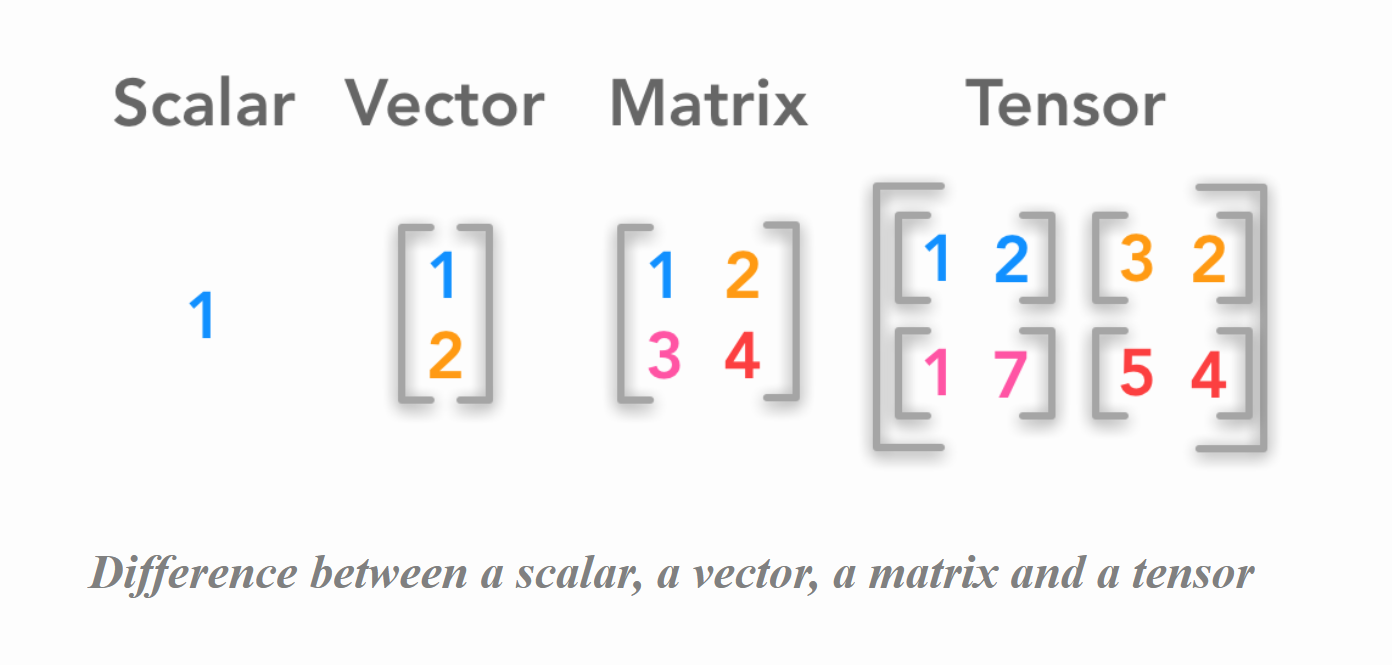
[Source](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)

Tensors are similar to Numpy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. You can parallelize tensor computation, which reduces the run time.


In [2]:
import torch
torch.manual_seed(0)

In [ ]:
# Check to see if your system has gpu
cuda = torch.cuda.is_available()
print(cuda) # prints True if cuda is available, else False

False


## PyTorch Tensor Construction

###Creating tensors




In [ ]:
t1 = torch.ones(size=(5,3))       # Tensors of ones of dimension 5x3
t2 = torch.zeros(size=(5,3))      # Tensors of zeros of dimension 5x3
t3 = torch.eye(3)                 # Identity matrix tensor of size 3
t4 = torch.rand(size=(3,4))       # Tensor of random numbers of size 3x4
t5 = torch.arange(7)              # A 1D tensor of size 7

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])
tensor([0, 1, 2, 3, 4, 5, 6])


### Creating tensors from existing data (list, array & existing tensors)

In [ ]:
import numpy as np

t1 = torch.tensor([1,2,3,4])                # from python list
t2 = torch.tensor(np.array([1,2,3,4]))      # from numpy array
t3 = torch.tensor(np.random.randn(3))       # from numpy array
t4 = t3.clone()                             # from existing torch tensor

print(t1)
print(t2)
print(t3)
print(t4)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4])
tensor([ 0.3314, -0.5340, -0.6146], dtype=torch.float64)
tensor([ 0.3314, -0.5340, -0.6146], dtype=torch.float64)


## Conversion from array to tensor and vice versa

In [ ]:
import numpy as np

# Create a numpy array
arr = np.array([10, 20, 30, 40, 50])
print(arr)
print(arr.dtype)
print("=======================================")

# Convert a numpy array to tensor
arr = torch.from_numpy(arr)
print(arr)
print(arr.dtype)
print("=======================================")

# Changing datatype of a tensor
arr = arr.type(torch.DoubleTensor)
# Alternative method: tensor.double()

# the data type
print(arr.type(torch.FloatTensor)) 
print(arr.type(torch.DoubleTensor).dtype)
print("=======================================")

# in case we have the data pushed on to the cuda, use tensor.cuda.DoubleTensor

[10 20 30 40 50]
int64
tensor([10, 20, 30, 40, 50])
torch.int64
tensor([10., 20., 30., 40., 50.])
torch.float64


In [ ]:
# Convert tensor to numpy array

t1 = torch.tensor([1,2,3,4])
t2 = t1.detach().numpy() # We have to first detach computational graph(used for computing gradients) from tensors to convert to numpy

print('Tensor:',t1)
print('Numpy array:',t2)

Tensor: tensor([1, 2, 3, 4])
Numpy array: [1 2 3 4]


[For more information on detach and computational graph](https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor)

### Pushing the Data to Device:

before we deal with the data in any way if it is pushed on to the device, which, in most cases, going to be the GPU, helps in the execution speed significantly as it saves the time needed to fetch the data from the server to the GPU repetitively.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Pushing the data to device
arr = arr.to(device)

print(arr)
print(arr.dtype)

# in case we have the data pushed on to the cuda, use tensor.cuda.DoubleTensor for the tensor conversion/casting

cpu
tensor([10., 20., 30., 40., 50.], dtype=torch.float64)
torch.float64


## Accessing Tensors
**NOTE:** Tensor values can easily be modified by using the accessing method, similar to numpy to select the desired section of the tensor to be modified

In [ ]:
# Basic 
t = torch.rand(size=(3,4,5)) # 3D tensor

print('Original Tensor t:')
print(t)
print('\n')

# Some valid ways of accessing individual elements in the tensor
print('t[0][0][0]\n', t[0][0][0])
print('t[1,2,3]\n', t[1,2,3])
print('t[-1,-1][-1]\n', t[-1,-1][-1])
print('\n')



# Tensor Slicing
print('t[0]\n', t[0])
print('t[:1]\n', t[:1])
print('t[:,1]\n', t[:,1])
print('t[:,:,3]\n', t[:,:,3])
print('t[:,:,-2:]\n', t[:,:,-2:])

Original Tensor t:
tensor([[[0.8953, 0.5727, 0.4605, 0.3413, 0.4747],
         [0.5910, 0.1181, 0.3805, 0.0841, 0.8069],
         [0.1816, 0.9568, 0.3711, 0.2136, 0.7402],
         [0.5745, 0.8462, 0.7087, 0.0183, 0.8162]],

        [[0.4058, 0.2790, 0.8175, 0.8647, 0.0605],
         [0.4548, 0.9106, 0.6936, 0.9212, 0.3287],
         [0.2242, 0.9300, 0.7084, 0.9800, 0.2912],
         [0.1790, 0.4414, 0.0292, 0.6960, 0.8688]],

        [[0.6200, 0.4506, 0.7479, 0.1826, 0.9891],
         [0.0028, 0.0210, 0.3818, 0.9084, 0.5501],
         [0.6920, 0.1335, 0.6823, 0.4441, 0.7004],
         [0.8531, 0.7173, 0.4575, 0.4692, 0.1864]]])


t[0][0][0]
 tensor(0.8953)
t[1,2,3]
 tensor(0.9800)
t[-1,-1][-1]
 tensor(0.1864)


t[0]
 tensor([[0.8953, 0.5727, 0.4605, 0.3413, 0.4747],
        [0.5910, 0.1181, 0.3805, 0.0841, 0.8069],
        [0.1816, 0.9568, 0.3711, 0.2136, 0.7402],
        [0.5745, 0.8462, 0.7087, 0.0183, 0.8162]])
t[:1]
 tensor([[[0.8953, 0.5727, 0.4605, 0.3413, 0.4747],
         [0.5

## Pivoting and Reshaping tensors
In the following section we cover common methods used to pivot and reshape tensors, namely:
1. Flatten
1. Squeeze
1. Reshape
1. View
1. Transpose
1. Permute

### Flatten: Changing a multi-dimensional tensors to a single dimension

In [ ]:
t = torch.rand(size=(3,4,5)) # 3D tensor
print(t) 
print(t.shape)               # 3x4x5
print(t.flatten())
print(t.flatten().shape)     # 60

tensor([[[0.4963, 0.7682, 0.0885, 0.1320, 0.3074],
         [0.6341, 0.4901, 0.8964, 0.4556, 0.6323],
         [0.3489, 0.4017, 0.0223, 0.1689, 0.2939],
         [0.5185, 0.6977, 0.8000, 0.1610, 0.2823]],

        [[0.6816, 0.9152, 0.3971, 0.8742, 0.4194],
         [0.5529, 0.9527, 0.0362, 0.1852, 0.3734],
         [0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
         [0.0317, 0.2081, 0.9298, 0.7231, 0.7423]],

        [[0.5263, 0.2437, 0.5846, 0.0332, 0.1387],
         [0.2422, 0.8155, 0.7932, 0.2783, 0.4820],
         [0.8198, 0.9971, 0.6984, 0.5675, 0.8352],
         [0.2056, 0.5932, 0.1123, 0.1535, 0.2417]]])
torch.Size([3, 4, 5])
tensor([0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
        0.6323, 0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000,
        0.1610, 0.2823, 0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527,
        0.0362, 0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317,
        0.2081, 0.9298, 0.7231, 0.7423, 

### Squeeze and Unsqueeze tensors
#### Squeeze and unsqueeze are very handy commands to add and remove a dimension from the tensor.

#### Unsequeeze

In [ ]:
t = torch.rand(size=(3,4,5))
ts = t.unsqueeze(0)   #unsequeeze along axis 0
ts2 = t.unsqueeze(1)  #unsequeeze along axis 1

print(ts) # A new dimension is added while all the following dimension are incremented by 1 ( positionally)
print('Original tensor shape',t.shape)
print('Unsequeeze along axis 0',ts.shape)
print('\n')

print(ts.unsqueeze(0)) # Can apply this operation as many times as required
print('ts.unsqueeze(0).shape:',ts.unsqueeze(0).shape)
print('\n')

print(ts2) # Unsqueeze can also be applied to other intermediate dimensions
print('Unsequeeze along axis 1',ts2.shape)
print('\n')


tensor([[[[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
          [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
          [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
          [0.9442, 0.8802, 0.0012, 0.5936, 0.4158]],

         [[0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
          [0.7529, 0.8579, 0.6870, 0.0051, 0.1757],
          [0.7497, 0.6047, 0.1100, 0.2121, 0.9704],
          [0.8369, 0.2820, 0.3742, 0.0237, 0.4910]],

         [[0.1235, 0.1143, 0.4725, 0.5751, 0.2952],
          [0.7967, 0.1957, 0.9537, 0.8426, 0.0784],
          [0.3756, 0.5226, 0.5730, 0.6186, 0.6962],
          [0.5300, 0.2560, 0.7366, 0.0204, 0.2036]]]])
Original tensor shape torch.Size([3, 4, 5])
Unsequeeze along axis 0 torch.Size([1, 3, 4, 5])


tensor([[[[[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
           [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
           [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
           [0.9442, 0.8802, 0.0012, 0.5936, 0.4158]],

          [[0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
       

#### Squeeze

In [ ]:
print(ts.squeeze(0))
print('ts.squeeze(0).shape:',ts.squeeze(0).shape)
print('\n')

print(ts2.squeeze(1))
print('ts2.squeeze(1).shape:',ts2.squeeze(1).shape)
print('\n')

# print(t.squeeze(0)) squeezing dimensions that have multiple elements have no impacts on the tensor
# print(ts.squeeze(1)) squeezing dimensions that have multiple elements have no impacts on the tensor

tensor([[[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
         [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
         [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
         [0.9442, 0.8802, 0.0012, 0.5936, 0.4158]],

        [[0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
         [0.7529, 0.8579, 0.6870, 0.0051, 0.1757],
         [0.7497, 0.6047, 0.1100, 0.2121, 0.9704],
         [0.8369, 0.2820, 0.3742, 0.0237, 0.4910]],

        [[0.1235, 0.1143, 0.4725, 0.5751, 0.2952],
         [0.7967, 0.1957, 0.9537, 0.8426, 0.0784],
         [0.3756, 0.5226, 0.5730, 0.6186, 0.6962],
         [0.5300, 0.2560, 0.7366, 0.0204, 0.2036]]])
ts.squeeze(0).shape: torch.Size([3, 4, 5])


tensor([[[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
         [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
         [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
         [0.9442, 0.8802, 0.0012, 0.5936, 0.4158]],

        [[0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
         [0.7529, 0.8579, 0.6870, 0.0051, 0.1757],
         [0.7497, 0.6047, 0.1

### Reshape tensor

In [ ]:
print('Orginal tensor shape: ', t.shape)
print(t.reshape((12,5)), t.reshape((12,5)).shape)
print(t.reshape(12,-1), t.reshape(12,-1).shape) # Can use -1 to specify one of the dimensions which is automatically inferred based on the elements in other dimensions
print(t.reshape(5,4,3), t.reshape(5,4,3).shape)
print(t.reshape(-1), t.reshape(-1).shape)
# print(t.reshape(12,6)) This command won't work as the number of elements need to be consistent with the source tensor


Orginal tensor shape:  torch.Size([3, 4, 5])
tensor([[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
        [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
        [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
        [0.9442, 0.8802, 0.0012, 0.5936, 0.4158],
        [0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
        [0.7529, 0.8579, 0.6870, 0.0051, 0.1757],
        [0.7497, 0.6047, 0.1100, 0.2121, 0.9704],
        [0.8369, 0.2820, 0.3742, 0.0237, 0.4910],
        [0.1235, 0.1143, 0.4725, 0.5751, 0.2952],
        [0.7967, 0.1957, 0.9537, 0.8426, 0.0784],
        [0.3756, 0.5226, 0.5730, 0.6186, 0.6962],
        [0.5300, 0.2560, 0.7366, 0.0204, 0.2036]]) torch.Size([12, 5])
tensor([[0.5191, 0.6159, 0.8102, 0.9801, 0.1147],
        [0.3168, 0.6965, 0.9143, 0.9351, 0.9412],
        [0.5995, 0.0652, 0.5460, 0.1872, 0.0340],
        [0.9442, 0.8802, 0.0012, 0.5936, 0.4158],
        [0.4177, 0.2711, 0.6923, 0.2038, 0.6833],
        [0.7529, 0.8579, 0.6870, 0.0051, 0.1757],
        [0.7497, 0.6047, 0.1100, 0

### View
#### View works exactly like reshape but may not work in all cases. Please refer to the link below to see how view and reshape are different.
#### View vs Reshape
#### https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch

### Transpose Tensor
#### This operation is primarily a generalization of the regular matrix transpose

In [ ]:
t = torch.tensor([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[-1,-2,-3,-4],[-5,-6,-7,-8],[-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.transpose(0,1).shape)
print(t.transpose(0,1))
print('\n')

print(t.transpose(0,2).shape)
print(t.transpose(0,2))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([4, 3, 2])
tensor([[[  1,  -1],
         [  5,  -5],
         [  9,  -9]],

        [[  2,  -2],
         [  6,  -6],
         [ 10, -10]],

        [[  3,  -3],
         [  7,  -7],
         [ 11, -11]],

        [[  4,  -4],
         [  8,  -8],
         [ 12, -12]]])




### Permute Tensor
#### This operation allows the user to simultaneously reorder multiple dimensions unlike transpose which interchanges two dimensions only


In [ ]:
t = torch.tensor([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[-1,-2,-3,-4],[-5,-6,-7,-8],[-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.permute(1,0,2).shape)
print(t.permute(1,0,2))
print('\n')

print(t.permute(1,2,0).shape)
print(t.permute(1,2,0))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([3, 4, 2])
tensor([[[  1,  -1],
         [  2,  -2],
         [  3,  -3],
         [  4,  -4]],

        [[  5,  -5],
         [  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11],
         [ 12, -12]]])




## Additional Tensor Operations
1. Concatenate
2. Stack
3. Repeat
4. Padding

### Concatenating Tensors

In [ ]:
t1 = torch.rand(size=(2,3,4))
t2 = torch.rand(size=(2,3,4))
t3 = torch.rand(size=(1,3,4))
t4 = torch.rand(size=(2,3,1))

print(t1)
print(t2)
print(t3)
print(t4)

print('Concatenating tensors\n')
print('Concatenating two tensors along axis 1')
print(torch.cat([t1,t2],dim=1), torch.cat([t1,t2],dim=1).shape)
print('Concatenating three tensors along axis 0')
print(torch.cat([t1,t2,t3],dim=0), torch.cat([t1,t2,t3],dim=0).shape)
print('Concatenating three tensors along axis 2')
print(torch.cat([t1,t2,t4],dim=2), torch.cat([t1,t2,t4],dim=2))
# print(torch.cat([t1,t2,t4],dim=2), torch.cat([t1,t2,t4],dim=1))

tensor([[[0.2599, 0.1663, 0.2119, 0.7875],
         [0.7648, 0.8838, 0.6814, 0.3330],
         [0.3603, 0.6477, 0.9110, 0.6359]],

        [[0.2634, 0.2650, 0.0273, 0.6080],
         [0.2194, 0.0542, 0.9384, 0.1753],
         [0.4431, 0.6432, 0.5159, 0.1636]]])
tensor([[[0.0958, 0.8985, 0.5814, 0.9148],
         [0.3324, 0.6473, 0.3857, 0.4778],
         [0.1955, 0.6691, 0.6581, 0.4897]],

        [[0.3875, 0.1918, 0.8458, 0.1278],
         [0.7048, 0.3319, 0.2588, 0.5898],
         [0.2403, 0.6152, 0.5982, 0.1288]]])
tensor([[[0.5832, 0.7130, 0.6979, 0.4371],
         [0.0901, 0.4229, 0.6737, 0.3176],
         [0.6898, 0.8330, 0.2389, 0.5049]]])
tensor([[[0.7067],
         [0.5392],
         [0.5418]],

        [[0.5624],
         [0.1069],
         [0.5393]]])
Concatenating tensors

Concatenating two tensors along axis 1
tensor([[[0.2599, 0.1663, 0.2119, 0.7875],
         [0.7648, 0.8838, 0.6814, 0.3330],
         [0.3603, 0.6477, 0.9110, 0.6359],
         [0.0958, 0.8985, 0.5814, 0.

### Tensor Stack
#### This operation can be imagined as a combination of unsqueeze and cat.

In [ ]:
t1 = torch.rand(size=(3,4))
t2 = torch.rand(size=(3,4))

print(t1.shape)
print(t1)
print('\n')

print(t2.shape)
print(t2)
print('\n')

print(torch.stack([t1,t2],dim=0).shape)
print(torch.stack([t1,t2],dim=0))

print(torch.stack([t1,t2],dim=1).shape)
print(torch.stack([t1,t2],dim=1))

print(torch.stack([t1,t2],dim=2).shape)
print(torch.stack([t1,t2],dim=2))

torch.Size([3, 4])
tensor([[0.6012, 0.8179, 0.9736, 0.8175],
        [0.9747, 0.4638, 0.0508, 0.2630],
        [0.8405, 0.4968, 0.2515, 0.1168]])


torch.Size([3, 4])
tensor([[0.0321, 0.0780, 0.3986, 0.7742],
        [0.7703, 0.0178, 0.8119, 0.1087],
        [0.3943, 0.2973, 0.4037, 0.4018]])


torch.Size([2, 3, 4])
tensor([[[0.6012, 0.8179, 0.9736, 0.8175],
         [0.9747, 0.4638, 0.0508, 0.2630],
         [0.8405, 0.4968, 0.2515, 0.1168]],

        [[0.0321, 0.0780, 0.3986, 0.7742],
         [0.7703, 0.0178, 0.8119, 0.1087],
         [0.3943, 0.2973, 0.4037, 0.4018]]])
torch.Size([3, 2, 4])
tensor([[[0.6012, 0.8179, 0.9736, 0.8175],
         [0.0321, 0.0780, 0.3986, 0.7742]],

        [[0.9747, 0.4638, 0.0508, 0.2630],
         [0.7703, 0.0178, 0.8119, 0.1087]],

        [[0.8405, 0.4968, 0.2515, 0.1168],
         [0.3943, 0.2973, 0.4037, 0.4018]]])
torch.Size([3, 4, 2])
tensor([[[0.6012, 0.0321],
         [0.8179, 0.0780],
         [0.9736, 0.3986],
         [0.8175, 0.7742]],

  

### Tensor Repeat

In [ ]:
t1 = torch.rand(3)

print('Original t1:')
print(t1)

print('t1.repeat(2)')
print(t1.repeat((2)))

print('t1.repeat(4,2)')
print(t1.repeat((4,2)))

print('t1.repeat(4,2,2)')
print(t1.repeat((4,2,2)))

Original t1:
tensor([0.3191, 0.8249, 0.2995])
t1.repeat(2)
tensor([0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995])
t1.repeat(4,2)
tensor([[0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
        [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
        [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
        [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995]])
t1.repeat(4,2,2)
tensor([[[0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
         [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995]],

        [[0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
         [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995]],

        [[0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
         [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995]],

        [[0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995],
         [0.3191, 0.8249, 0.2995, 0.3191, 0.8249, 0.2995]]])


### Tensor Padding

In [ ]:
from torch.nn import functional as F

x = torch.tensor([[1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4]])
# t3 = torch.rand(size=(1,3,4))
pad_left   = 1
pad_right  = 2
pad_top    = 1
pad_bottom = 2

a = F.pad( x, (pad_left,pad_right,pad_top,pad_bottom), mode = 'constant', value=0)

print(a)

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 1, 2, 3, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])


## Mathematical Operations
1. Element-wise operations
1. Redution operations
1. Comparison operations
1. Vector/Matrix operations

### Element-wise operations
#### Similar to numpy arrays, torch offers all the basic mathematical operations, we list some of the most commonly used operations here

Initialize tensors

In [ ]:
t1 = torch.ones(3)
t2 = torch.ones(3)
t3 = torch.ones(size=(3,4))
t4 = torch.ones(size=(3,4))
t5 = torch.ones(size=(3,1))

print('original t1:')
print(t1.shape)

print('\noriginal t2:')
print(t2.shape)

print('\noriginal t3:')
print(t3.shape)

print('\noriginal t4:')
print(t4.shape)

print('\noriginal t5:')
print(t5.shape)

original t1:
torch.Size([3])

original t2:
torch.Size([3])

original t3:
torch.Size([3, 4])

original t4:
torch.Size([3, 4])

original t5:
torch.Size([3, 1])


Addition with scalar

In [ ]:
print('t1+10')
print(t1+10)

t1+10
tensor([11., 11., 11.])


Addition with tensor

In [ ]:
print('t1+t2')
print(t1+t2)

t1+t2
tensor([2., 2., 2.])


Multiplication with scalar

In [ ]:
print('t1*3')
print(t1*3)

t1*3
tensor([3., 3., 3.])


Multiplication with tensor

In [ ]:
print('t1*t2')
print(t1*t2)

t1*t2
tensor([1., 1., 1.])


Similar operations extend to multi-dimensional tensors

In [ ]:
print('t3+t4')
print(t3+t4)

t3+t4
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


Broadcasting tensors of different dimensions

When broadcasting two multi-dimensional tensors, Pytorch will automatically match their corresponding dimensions and repeat the unmatched dimention to enable the operation.

In [ ]:
print(t3.shape, t5.shape)
print(t3)
print(t5)
print(t3+t5)

torch.Size([3, 4]) torch.Size([3, 1])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


### Reduction Operations
#### Torch supports all commonly used mathematical reduction operations such as sum(), mean(), std(), max(), argmax(), prod(), unique() etc.
#### These can either be applied on the entire tensor or along specific dimensions.

In [ ]:


t1 = torch.ones(3)
t2 = torch.ones(size=(3,4))

print('\noriginal t1:')
print(t1)

print('\noriginal t2:')
print(t2)

print('\nt1.sum()')
print(t1.sum())
print(torch.sum(t1))

print('\nt2.sum()')
print(t2.sum())
print(torch.sum(t2))

print('\nt2.sum(axis=0)')
print(t2.sum(axis=0))
print(torch.sum(t2, axis=0))

print('\nt2.sum(axis=1)')
print(t2.sum(axis=1))
print(torch.sum(t2, axis=1))


original t1:
tensor([1., 1., 1.])

original t2:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

t1.sum()
tensor(3.)
tensor(3.)

t2.sum()
tensor(12.)
tensor(12.)

t2.sum(axis=0)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])

t2.sum(axis=1)
tensor([4., 4., 4.])
tensor([4., 4., 4.])


### Comparison Operations

In [ ]:
t1 = torch.rand(size=(3,4))
t2 = torch.rand(size=(3,4))
t3 = torch.rand(size=(3,4))

print('original t1:')
print(t1)

print('original t2:')
print(t2)

print('original t3:')
print(t3)

# Basic comparison operations
print('t1>t3')
print(t1>t2)

print('t2!=t3')
print(t2!=t3)

# Combining reduction operations with boolean tensors
print((t1>t2).any())
print((t1>t2).all())
print((t1>t2).any(axis=0))
print((t1>t2).any(axis=1))

print((t2!=t3).any())
print((t2!=t3).all())
print(torch.any(t2!=t3))
print(torch.all(t2!=t3))

original t1:
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])
original t2:
tensor([[0.0223, 0.1689, 0.2939, 0.5185],
        [0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742]])
original t3:
tensor([[0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320],
        [0.1759, 0.2698, 0.1507, 0.0317]])
t1>t3
tensor([[ True,  True, False, False],
        [False, False,  True,  True],
        [False, False, False, False]])
t2!=t3
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor(True)
tensor(False)
tensor([True, True, True, True])
tensor([ True,  True, False])
tensor(True)
tensor(True)
tensor(True)
tensor(True)


### Vector/Matrix operations

vector - vector

In [3]:
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)

print('tensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print((tensor1 @ tensor2).size())
print(torch.matmul(tensor1, tensor2).size())

tensor1
torch.Size([3])
tensor2
torch.Size([3])
torch.matmul(tensor1, tensor2)
torch.Size([])
torch.Size([])


matrix - vector

In [ ]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([3, 4])
tensor2
torch.Size([4])
torch.matmul(tensor1, tensor2)
torch.Size([3])
torch.Size([3])


batched matrix - broadcasted vector

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
# when doing various operations between n-dimensional matrix and 
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([4])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3])


batched matrix - batched matrix

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([10, 4, 5])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3, 5])


batched matrix - broadcasted matrix

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())


tensor1
torch.Size([10, 3, 4])
tensor2
torch.Size([4, 5])
torch.matmul(tensor1, tensor2)
torch.Size([10, 3, 5])


Einsum

In [ ]:
import time

tensor1 = torch.ones(5, 3)
tensor2 = torch.ones(5, 3)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

start_time = time.time()
product = torch.einsum('ki, kj', tensor1, tensor2)
end_time = time.time()
print("torch.einsum('bik, bkj', tensor1, tensor2)")
print('einsum time:', end_time - start_time)
print(product.shape)

start_time = time.time()
tensor1 = torch.permute(tensor1, (1, 0))
product = tensor1 @ tensor2
end_time = time.time()
print("\ntensor1 @ tensor2")
print('einsum time:', end_time - start_time)
print(product.shape)



tensor1
torch.Size([5, 3])
tensor2
torch.Size([5, 3])
torch.einsum('bik, bkj', tensor1, tensor2)
einsum time: 0.0002799034118652344
torch.Size([3, 3])

tensor1 @ tensor2
einsum time: 0.008291482925415039
torch.Size([3, 3])
